# Decision Tree

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.datasets import load_iris

In [6]:
data = load_iris()

In [7]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
x = df
y = data.target

In [13]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [19]:
x_train.shape, x_test.shape

((105, 4), (45, 4))

In [20]:
y_train.shape, y_test.shape

((105,), (45,))

In [21]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier

DecisionTreeClassifier(criterion='entropy')

In [22]:
# train the model

classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9, 'x[3] <= 0.8\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[2] <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 

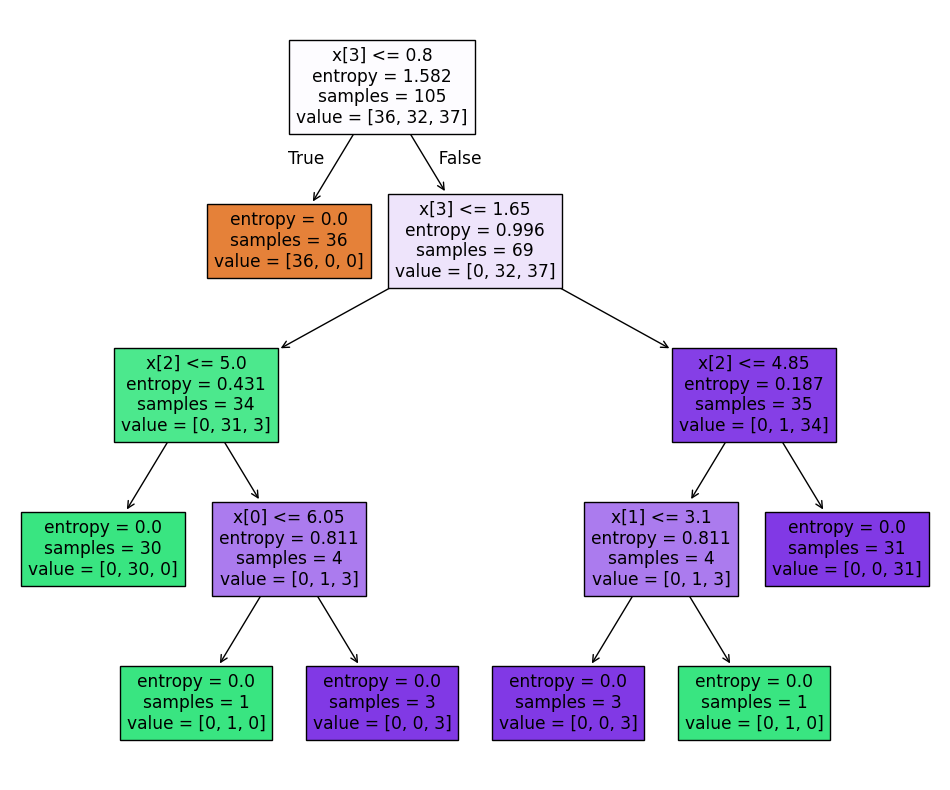

In [26]:
# visiualitation of Decision tree

from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(classifier, filled = True)
#plt.show()  # not to see the entropy details

In [27]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556

# Post-pruning

In [29]:
# post-pruning >> after making complete tree you have cut it to avoid overfitting.
# for only small data set

# observation :
# observe the decision tree plot, you will realise the last split is actually
# overfitting, diving the data in such as way that each node is 100 percent 
# pure leading to low no. of data point, i.e 1 and 3
# so reduce the depth of decision tree

In [31]:
from sklearn.tree import  DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

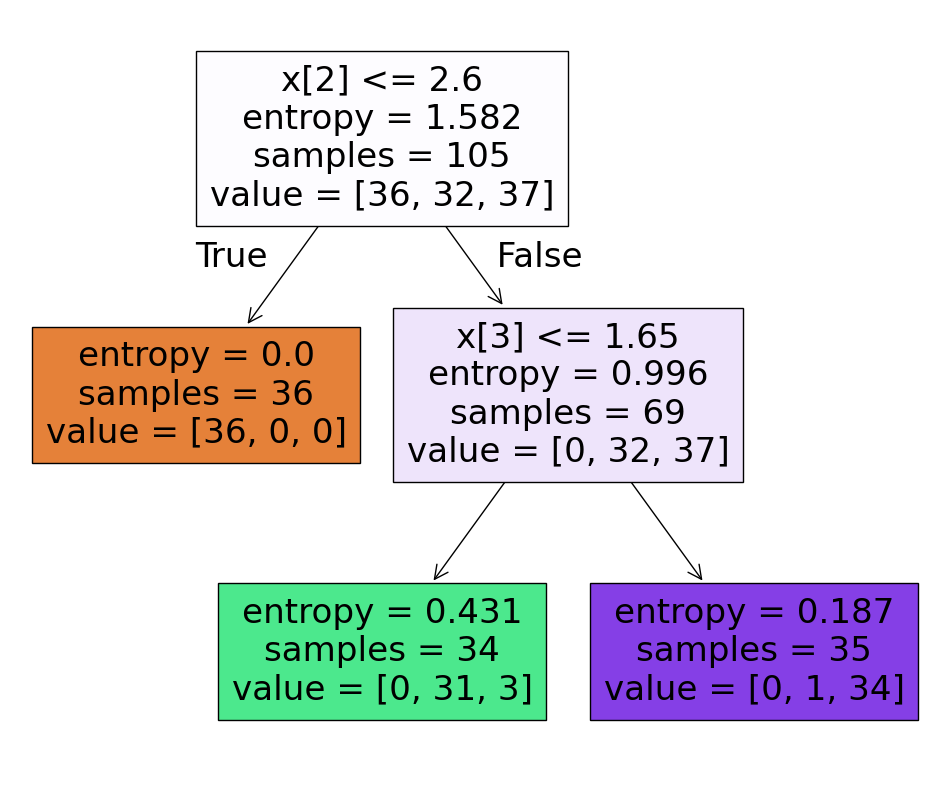

In [32]:
# visiualitation of Decision tree

from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(classifier, filled = True)
plt.show()  # not to see the entropy details

In [33]:
classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9555555555555556

In [34]:
# the accuracy score is same, earlier it was a overfitting model

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# pre-pruning

In [45]:
# prepruning using hyperparameter tuning

parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'], 
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 10],
    'max_features' : ['sqrt','log2', 'auto']
}
    

In [51]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
model = GridSearchCV(clf, param_grid=parameter, cv = 5, scoring='accuracy', verbose=3)

In [52]:
model.fit(x_train, y_train)  # model wiil be trained

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.619 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [53]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [54]:
model.best_socre_

AttributeError: 'GridSearchCV' object has no attribute 'best_socre_'

In [55]:
y_pred = model.best_estimator_.predict(x_test)

In [56]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [57]:
accuracy_score(y_test, y_pred)

0.9555555555555556